# 데이터와 판다스
#### 다양한 데이터 포함
- 이종(hetergeneous) 자료형을 가진 테이블 데이터
- 시계열 데이터
- 레이블을 가진 행렬 데이터
- 관측 통계 데이터

#### 핵심 구조
- 시리즈: 1차원 데이터
- 데이터 프레임: 2차원 데이터

#### 판다스의 업무
- 결측 데이터 처리
- 데이터 추가 삭제(행, 열의 추가 삭제)

#### 데이터 처리
- 엑셀
- CSV 파일
- 리스트
- 딕셔너리  
- 넘파이행렬


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import csv
import os

- csv는 열을 , 로 구분

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### CSV library


In [31]:
import csv
f = open("/content/drive/MyDrive/Colab Notebooks/문해철/weather.csv",encoding="cp949")
data = csv.reader(f)
header = next(data)
for row in data:
  print(row)
f.close()

['2010-08-01', '28.7', '8.3', '3.4']
['2010-08-02', '25.2', '8.7', '3.8']
['2010-08-03', '22.1', '6.3', '2.9']
['2010-08-04', '25.3', '6.6', '4.2']
['2010-08-05', '27.2', '9.1', '5.6']
['2010-08-06', '26.8', '9.8', '8']
['2010-08-07', '27.5', '9.1', '5']
['2010-08-08', '26.6', '5.9', '4']
['2010-08-09', '26.9', '5.1', '3.1']
['2010-08-10', '25.6', '10.2', '5.5']
['2010-08-11', '24.6', '9.4', '4.8']
['2010-08-12', '23.7', '8.7', '2.6']
['2010-08-13', '24.3', '10.9', '4.6']
['2010-08-14', '25', '10.8', '4.4']
['2010-08-15', '24.5', '16.9', '10.3']
['2010-08-16', '26.2', '9.8', '3.2']
['2010-08-17', '23.9', '4.2', '1.6']
['2010-08-18', '23.4', '4.2', '2.1']
['2010-08-19', '24.3', '4', '1.9']
['2010-08-20', '25.4', '5', '3.2']
['2010-08-21', '27.8', '7.6', '4.2']
['2010-08-22', '28.3', '5.9', '2.5']
['2010-08-23', '28.9', '9.3', '6.2']
['2010-08-24', '27.5', '8.3', '3']
['2010-08-25', '24.7', '6.8', '1.9']
['2010-08-26', '25.8', '4.3', '2.5']
['2010-08-27', '26.4', '2.7', '1.6']
['2010-08-

In [44]:
data = csv.reader(open("/content/drive/MyDrive/Colab Notebooks/문해철/weather.csv",encoding="cp949"))
header = next(data)
print(header)
max_wind = 0.0
for row in data:
  if row[2] == "":
    wind = 0
  else:
    wind = float(row[2])
  if max_wind < wind:
    max_wind = wind
print("최대 풍속 :",max_wind)

['일시', '평균기온', '최대풍속', '평균풍속']
최대 풍속 : 26.0


['일시', '평균기온', '최대풍속', '평균풍속']
[3.7574193548387074, 3.946785714285715, 4.390291262135921, 4.62248322147651, 4.219354838709678, 3.4609999999999985, 3.8774193548387106, 3.5961290322580615, 3.6616666666666666, 3.961612903225804, 3.9306666666666654, 3.817096774193548]


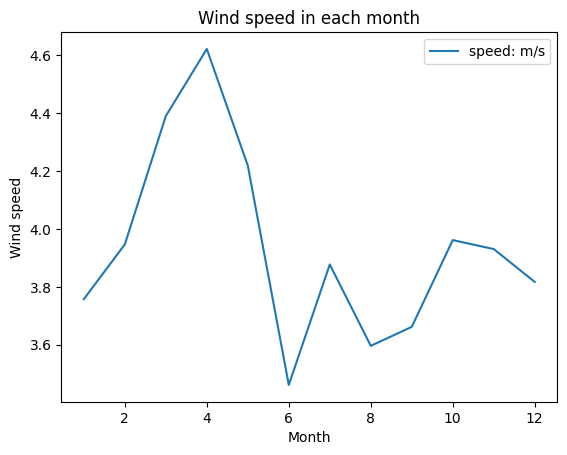

In [51]:
data = csv.reader(open("/content/drive/MyDrive/Colab Notebooks/문해철/weather.csv",encoding="cp949"))
header = next(data)
print(header)
monthcnt = [ 0 for _ in range(12)]
daycnt = [0 for _ in range(12)]
for row in data:
  month = int(row[0][5:7])
  if row[3] != '':
    wind = float(row[3])
    monthcnt[month-1] += wind
    daycnt[month-1] += 1

y = [monthcnt[i]/daycnt[i] for i in range(12)]
print(y)
x = range(1,13)
plt.plot(x,y, label = "speed: m/s")
plt.xlabel("Month")
plt.ylabel("Wind speed")
plt.title("Wind speed in each month")
plt.legend()
plt.show()


### series & data frame

In [58]:
import pandas as pd
import numpy as np
s = pd.Series([1,3,5,np.nan,6,8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [62]:

name_series = pd.Series(["홍길동","김철수","이영희", "박민수", "강이안", "강지안"])
age_series = pd.Series([20,23,25,24,20,23])
sex_series = pd.Series(["남","남","여","남","여","여"])
grade_series = pd.Series([3.43,2.34,4.14,3.32,2.43, 1.82])

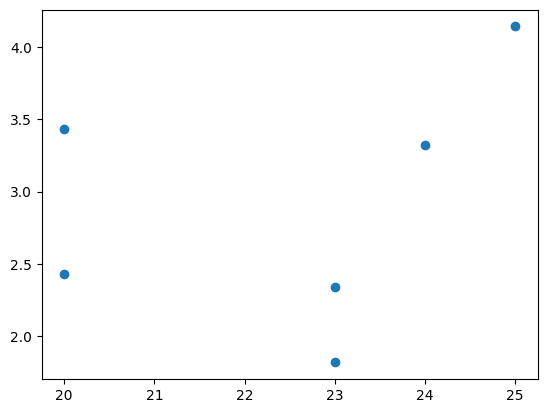

In [67]:
df = pd.DataFrame({"이름":name_series, "나이":age_series, "성별":sex_series, "학점":grade_series})
df
plt.plot(df["나이"], df["학점"], "o")
plt.show()

In [84]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/문해철/weather.csv", encoding="cp949")
df

df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/문해철/weather.csv", encoding="cp949", index_col=0)
# index_col = 0 이면 0번재 컬럼의 값을 인덱스로써 사용하고 싶은 것.
df1

print(df1[["최대풍속", "평균풍속"]])

            최대풍속  평균풍속
일시                    
2010-08-01   8.3   3.4
2010-08-02   8.7   3.8
2010-08-03   6.3   2.9
2010-08-04   6.6   4.2
2010-08-05   9.1   5.6
...          ...   ...
2020-07-27   4.2   1.7
2020-07-28   4.5   1.6
2020-07-29   3.2   1.0
2020-07-30   9.7   2.4
2020-07-31   4.8   2.5

[3653 rows x 2 columns]


<Axes: title={'center': '최대풍속'}>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing 

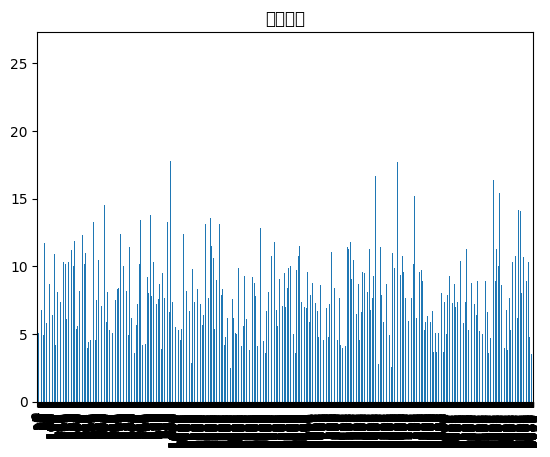

In [85]:
dat = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/문해철/weather.csv", encoding="cp949")
dat
dat['최대풍속'].plot(kind="bar", title="최대풍속")

AttributeError: Rectangle.set() got an unexpected keyword argument 'bin'

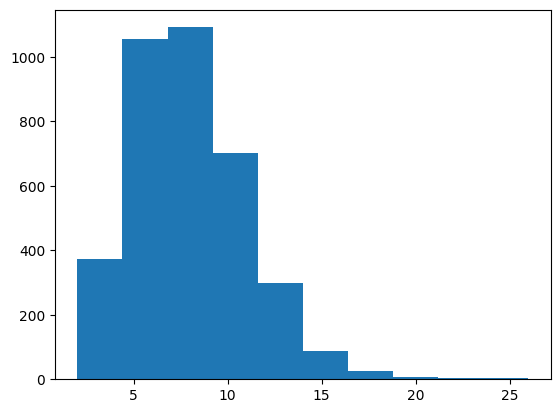

In [91]:
dat['평균풍속'].plot(kind="hist", bin = 33)

In [98]:
dat.describe()
dat.count()
dat=dat.fillna(dat.mean)
dat.count()

,0
일시,3653
평균기온,3653
최대풍속,3653
평균풍속,3653
